In [ ]:
pip install mlxtend --user

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
pip install pydot


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import datetime
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy.io import loadmat
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
from skimage import io, color, exposure

In [ ]:
#dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__)

Num GPUs Available:  0
2.7.0


In [ ]:
#training and testing set
train = loadmat('/content/drive/MyDrive/Colab Notebooks/train_32x32.mat')
test = loadmat('/content/drive/MyDrive/Colab Notebooks/test_32x32.mat')

In [ ]:
train_img = np.array(train['X'])
test_img = np.array(test['X'])

In [ ]:
train_label = train['y']
test_label = test['y']

In [ ]:
train_img = np.moveaxis(train_img, -1, 0)
test_img = np.moveaxis(test_img, -1, 0)

In [ ]:
train_label[train_label == 10] = 0
test_label[test_label == 10] = 0

In [ ]:
from skimage import io, color, exposure
from skimage.color import rgb2gray

In [ ]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2989, 0.5870, 0.1140]), axis=3)

def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat):
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0],cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


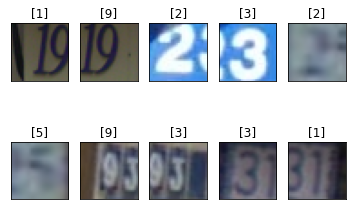

In [ ]:
plot_images(train_img, train_label, 2, 5)

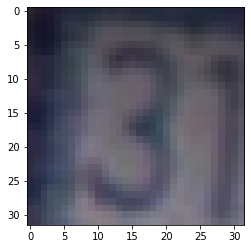

In [ ]:
plt.imshow(train_img[8])
plt.show()

In [ ]:
print("Label:",train_label[8])

Label: [3]


In [ ]:
X_train = train_img.astype(np.float64)
X_test = test_img.astype(np.float64)

In [ ]:
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)


In [ ]:
#normalization
X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

In [ ]:
#training and validating set
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

## Model 1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator
from tensorflow.keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, Callback, LambdaCallback
from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(32, 32,3)))
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))
model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

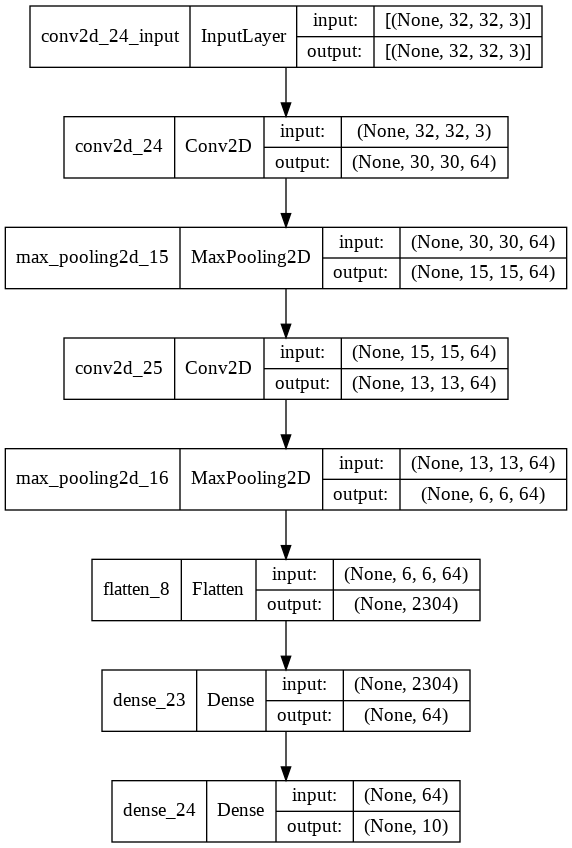

In [ ]:
#Diagram of CNN architecture
plot_model(model1, to_file= 'model1_plot.png', show_shapes=True,show_layer_names= True)

In [ ]:
r = model1.fit(X_train,y_train,
  validation_data=(x_val, y_val), callbacks= [model_checkpoint_callback], 
  epochs=10
)

Epoch 1/10
1832/1832 [==============================] - 77s 42ms/step - loss: 0.9887 - accuracy: 0.6824 - val_loss: 0.6858 - val_accuracy: 0.7903
Epoch 2/10
1832/1832 [==============================] - 75s 41ms/step - loss: 0.5825 - accuracy: 0.8200 - val_loss: 0.5168 - val_accuracy: 0.8443
Epoch 3/10
1832/1832 [==============================] - 75s 41ms/step - loss: 0.4931 - accuracy: 0.8478 - val_loss: 0.4902 - val_accuracy: 0.8485
Epoch 4/10
1832/1832 [==============================] - 76s 42ms/step - loss: 0.4392 - accuracy: 0.8652 - val_loss: 0.4778 - val_accuracy: 0.8572
Epoch 5/10
1832/1832 [==============================] - 76s 42ms/step - loss: 0.4008 - accuracy: 0.8766 - val_loss: 0.4499 - val_accuracy: 0.8658
Epoch 6/10
1832/1832 [==============================] - 76s 41ms/step - loss: 0.3686 - accuracy: 0.8868 - val_loss: 0.4177 - val_accuracy: 0.8781
Epoch 7/10
1832/1832 [==============================] - 75s 41ms/step - loss: 0.3396 - accuracy: 0.8961 - val_loss: 0.4158 -

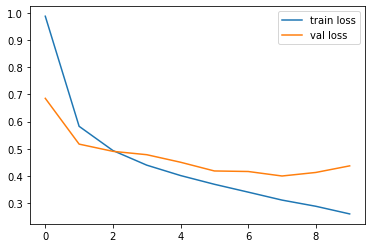

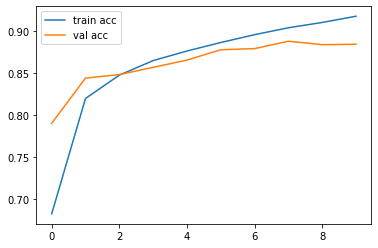

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred_model1 = model1.predict(X_test)
y_pred_model1 = np.argmax(y_pred_model1, axis=1)
len(y_pred_model1)

26032

In [ ]:
print("F1 Score:",f1_score(test_label, y_pred_model1,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model1))
model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model1.predict(X_test), y_test)

F1 Score: 0.872783822622365
Explained Variance Score: 0.7041655246900761


0.01744427254039139

## Model 2

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(32, 32,3)))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
model2._name = "MyModel2"
model2.summary()

Model: "MyModel2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               295

In [ ]:
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

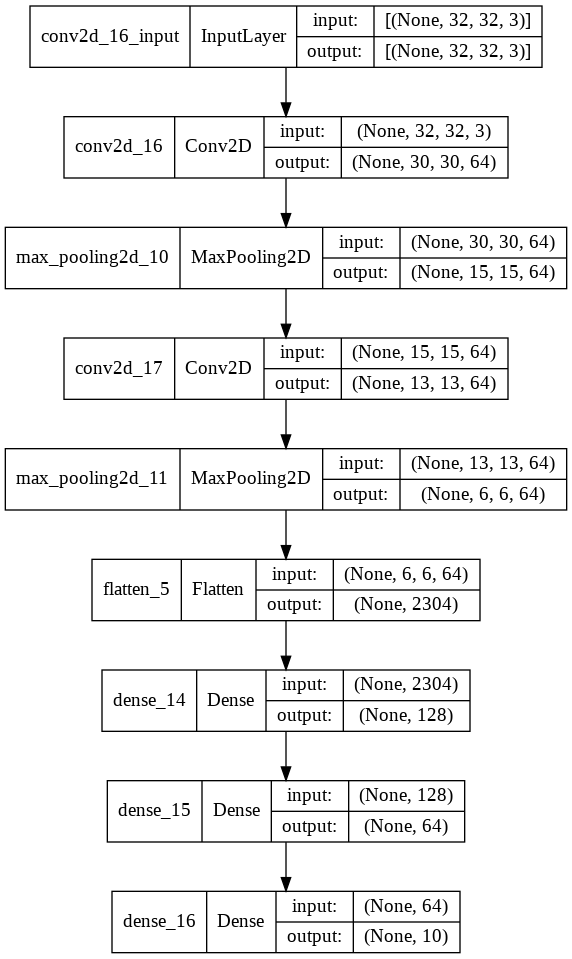

In [ ]:
#Diagram of CNN architecture
plot_model(model2, to_file= 'model2_plot.png', show_shapes=True,show_layer_names= True)

In [ ]:
r = model2.fit(X_train,y_train,
  validation_data=(x_val, y_val), callbacks= [model_checkpoint_callback], 
  epochs=10
)

Epoch 1/10
1832/1832 [==============================] - 130s 71ms/step - loss: 0.9857 - accuracy: 0.6849 - val_loss: 0.5931 - val_accuracy: 0.8292
Epoch 2/10
1832/1832 [==============================] - 130s 71ms/step - loss: 0.4896 - accuracy: 0.8563 - val_loss: 0.4613 - val_accuracy: 0.8632
Epoch 3/10
1832/1832 [==============================] - 129s 71ms/step - loss: 0.4141 - accuracy: 0.8777 - val_loss: 0.4224 - val_accuracy: 0.8773
Epoch 4/10
1832/1832 [==============================] - 131s 71ms/step - loss: 0.3649 - accuracy: 0.8910 - val_loss: 0.3985 - val_accuracy: 0.8825
Epoch 5/10
1832/1832 [==============================] - 130s 71ms/step - loss: 0.3334 - accuracy: 0.9010 - val_loss: 0.3758 - val_accuracy: 0.8885
Epoch 6/10
1832/1832 [==============================] - 129s 70ms/step - loss: 0.3024 - accuracy: 0.9095 - val_loss: 0.3800 - val_accuracy: 0.8870
Epoch 7/10
1832/1832 [==============================] - 129s 70ms/step - loss: 0.2772 - accuracy: 0.9164 - val_loss: 0

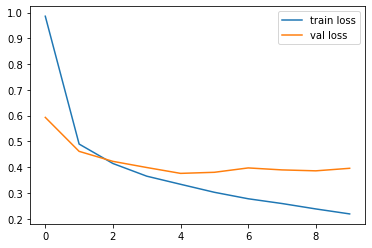

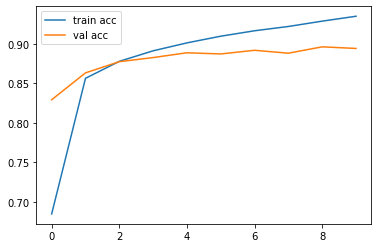

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred_model2 = model2.predict(X_test)
y_pred_model2 = np.argmax(y_pred_model2, axis=1)
len(y_pred_model2)

26032

In [ ]:
print("F1 Score:",f1_score(test_label, y_pred_model2,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2))
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2.predict(X_test), y_test)

F1 Score: 0.8663299023817593
Explained Variance Score: 0.7007181146911718


0.017899588176402782

## Model 3

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(32, 32,3)))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu'))
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3._name = "MyModel3"
model3.summary()

Model: "MyModel3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 64)          369

In [ ]:
model3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

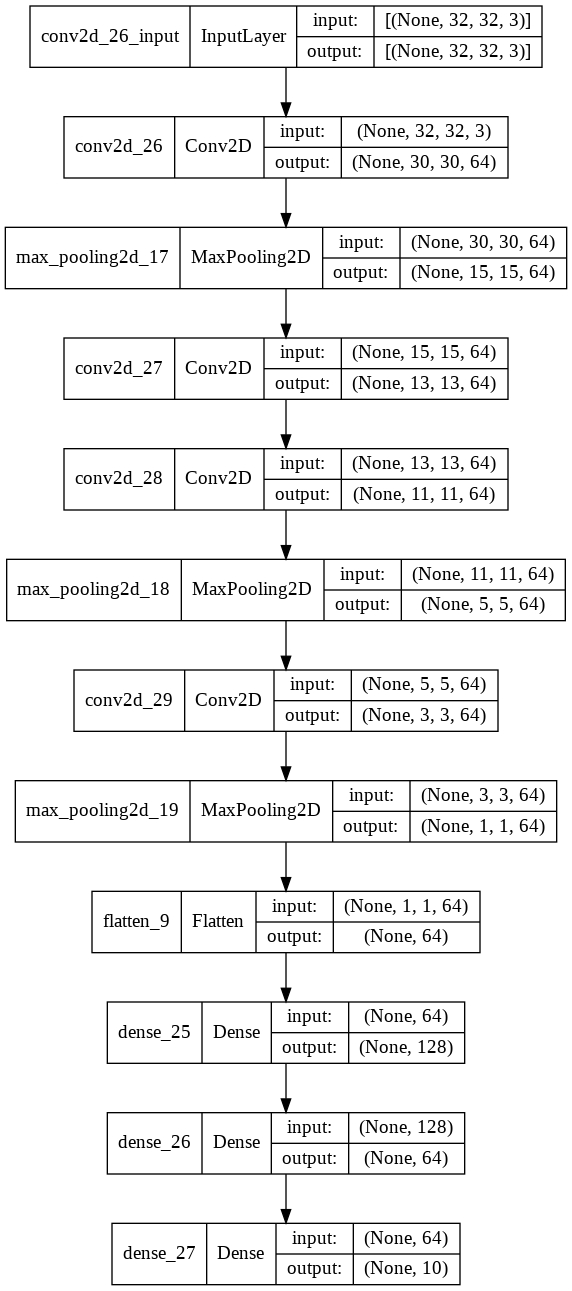

In [ ]:
#Diagram of CNN architecture
plot_model(model3, to_file= 'model3_plot.png', show_shapes=True,show_layer_names= True)

In [ ]:
r = model3.fit(X_train,y_train,
  validation_data=(x_val, y_val), callbacks= [model_checkpoint_callback], 
  epochs=10
)

Epoch 1/10
1832/1832 [==============================] - 178s 97ms/step - loss: 1.0918 - accuracy: 0.6356 - val_loss: 0.6063 - val_accuracy: 0.8074
Epoch 2/10
1832/1832 [==============================] - 173s 95ms/step - loss: 0.5614 - accuracy: 0.8241 - val_loss: 0.5359 - val_accuracy: 0.8335
Epoch 3/10
1832/1832 [==============================] - 174s 95ms/step - loss: 0.4652 - accuracy: 0.8549 - val_loss: 0.4429 - val_accuracy: 0.8643
Epoch 4/10
1832/1832 [==============================] - 174s 95ms/step - loss: 0.4147 - accuracy: 0.8725 - val_loss: 0.4269 - val_accuracy: 0.8682
Epoch 5/10
1832/1832 [==============================] - 174s 95ms/step - loss: 0.3786 - accuracy: 0.8825 - val_loss: 0.4021 - val_accuracy: 0.8799
Epoch 6/10
1832/1832 [==============================] - 173s 94ms/step - loss: 0.3512 - accuracy: 0.8916 - val_loss: 0.4011 - val_accuracy: 0.8793
Epoch 7/10
1832/1832 [==============================] - 173s 94ms/step - loss: 0.3333 - accuracy: 0.8978 - val_loss: 0

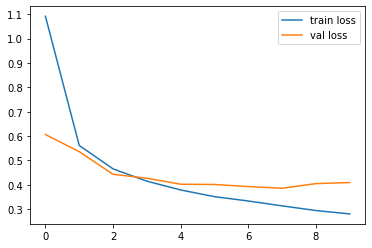

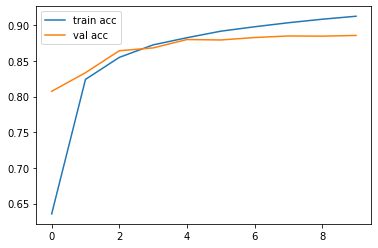

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred_model3 = model3.predict(X_test)
y_pred_model3 = np.argmax(y_pred_model3, axis=1)
len(y_pred_model3)

26032

In [ ]:
print("F1 Score:",f1_score(test_label, y_pred_model3,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model3))
model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model3.predict(X_test), y_test)

F1 Score: 0.8694121501182923
Explained Variance Score: 0.6903169910075986


0.018321590958029328

## Task 3

In [ ]:
# Applying average pooling instead of Maxpooling on on the best model ( Best Model: 2)


In [ ]:
model2_avg = tf.keras.models.Sequential()
model2_avg.add(
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(32, 32,3)))
model2_avg.add(tf.keras.layers.AveragePooling2D((2, 2)))
model2_avg.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu'))
model2_avg.add(tf.keras.layers.AveragePooling2D((2, 2)))
model2_avg.add(tf.keras.layers.Flatten())
model2_avg.add(tf.keras.layers.Dense(128, activation='relu'))
model2_avg.add(tf.keras.layers.Dense(64, activation='relu'))
model2_avg.add(tf.keras.layers.Dense(10, activation='softmax'))
model2_avg._name = "MyModel2_avg"
model2_avg.summary()

Model: "MyModel2_avg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [ ]:
model2_avg.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

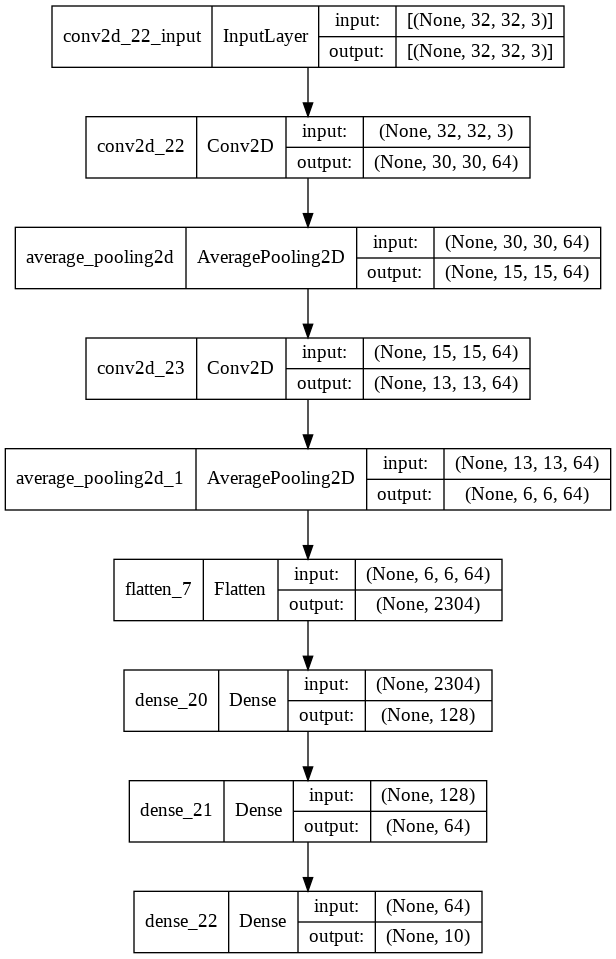

In [ ]:
#Diagram of CNN architecture
plot_model(model2_avg, to_file= 'model2_avg_plot.png', show_shapes=True,show_layer_names= True)

In [ ]:
r = model2_avg.fit(X_train,y_train,
  validation_data=(x_val, y_val), callbacks= [model_checkpoint_callback], 
  epochs=10
)

Epoch 1/10
1832/1832 [==============================] - 120s 65ms/step - loss: 1.1355 - accuracy: 0.6263 - val_loss: 0.5447 - val_accuracy: 0.8394
Epoch 2/10
1832/1832 [==============================] - 119s 65ms/step - loss: 0.4901 - accuracy: 0.8557 - val_loss: 0.4651 - val_accuracy: 0.8610
Epoch 3/10
1832/1832 [==============================] - 119s 65ms/step - loss: 0.4104 - accuracy: 0.8764 - val_loss: 0.4064 - val_accuracy: 0.8791
Epoch 4/10
1832/1832 [==============================] - 117s 64ms/step - loss: 0.3624 - accuracy: 0.8918 - val_loss: 0.3922 - val_accuracy: 0.8830
Epoch 5/10
1832/1832 [==============================] - 120s 66ms/step - loss: 0.3241 - accuracy: 0.9029 - val_loss: 0.3778 - val_accuracy: 0.8879
Epoch 6/10
1832/1832 [==============================] - 119s 65ms/step - loss: 0.2942 - accuracy: 0.9129 - val_loss: 0.3945 - val_accuracy: 0.8834
Epoch 7/10
1832/1832 [==============================] - 120s 65ms/step - loss: 0.2672 - accuracy: 0.9190 - val_loss: 0

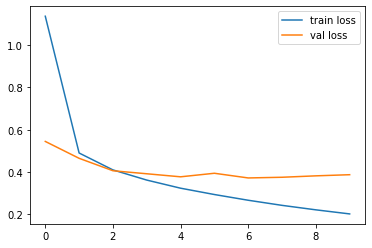

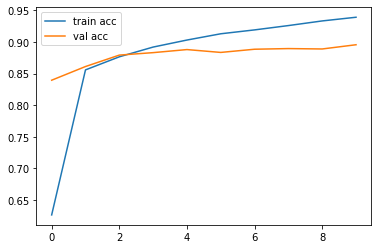

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2_avg, to_file='model2_avg_plot.png', show_shapes=True, show_layer_names=True)
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred_model2_avg = model2_avg.predict(X_test)
y_pred_model2_avg = np.argmax(y_pred_model2_avg, axis=1)
len(y_pred_model2_avg)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg))
model2_avg.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg.predict(X_test), y_test)

F1 Score: 0.8686194928077958
Explained Variance Score: 0.7083761562608912


0.01760070151105323

# Statistical significance test of Model 1, 2, 3 and with Model 2_average pooling

In [ ]:
from scipy import stats
#use t test for stats significance testing

In [ ]:
# Best model 2 with Model 1
stats.ttest_ind(y_pred_model2, y_pred_model1)

Ttest_indResult(statistic=3.584926428673076, pvalue=0.0003374813886798029)

In [ ]:
# Best model 2 with Model 3
stats.ttest_ind(y_pred_model2, y_pred_model3)

Ttest_indResult(statistic=3.626601734727775, pvalue=0.0002874497666729951)

In [ ]:
# Best model 2 (Maxpooling) with model 2_avg (Average pooling)
stats.ttest_ind(y_pred_model2, y_pred_model2_avg)

Ttest_indResult(statistic=1.3347880955050784, pvalue=0.18195154783253592)

## Batch_Normalization for Best model (Model 2 with Average pooling)

In [ ]:
from keras.layers import BatchNormalization
model2_avg_BN = tf.keras.models.Sequential()
model2_avg_BN.add(
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(32, 32,3)))
model2_avg_BN.add(tf.keras.layers.AveragePooling2D((2, 2)))
model2_avg_BN.add(tf.keras.layers.BatchNormalization())
model2_avg_BN.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu'))
model2_avg_BN.add(tf.keras.layers.AveragePooling2D((2, 2)))
model2_avg_BN.add(tf.keras.layers.Flatten())
model2_avg_BN.add(tf.keras.layers.Dense(128, activation='relu'))
model2_avg_BN.add(tf.keras.layers.BatchNormalization())
model2_avg_BN.add(tf.keras.layers.Dense(64, activation='relu'))
model2_avg_BN.add(tf.keras.layers.BatchNormalization())
model2_avg_BN.add(tf.keras.layers.Dense(10, activation='softmax'))
model2_avg_BN._name = "MyModel2_avg_BN"
model2_avg_BN.summary()

Model: "MyModel2_avg_BN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 average_pooling2d_2 (Averag  (None, 15, 15, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                   

In [ ]:
model2_avg_BN.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

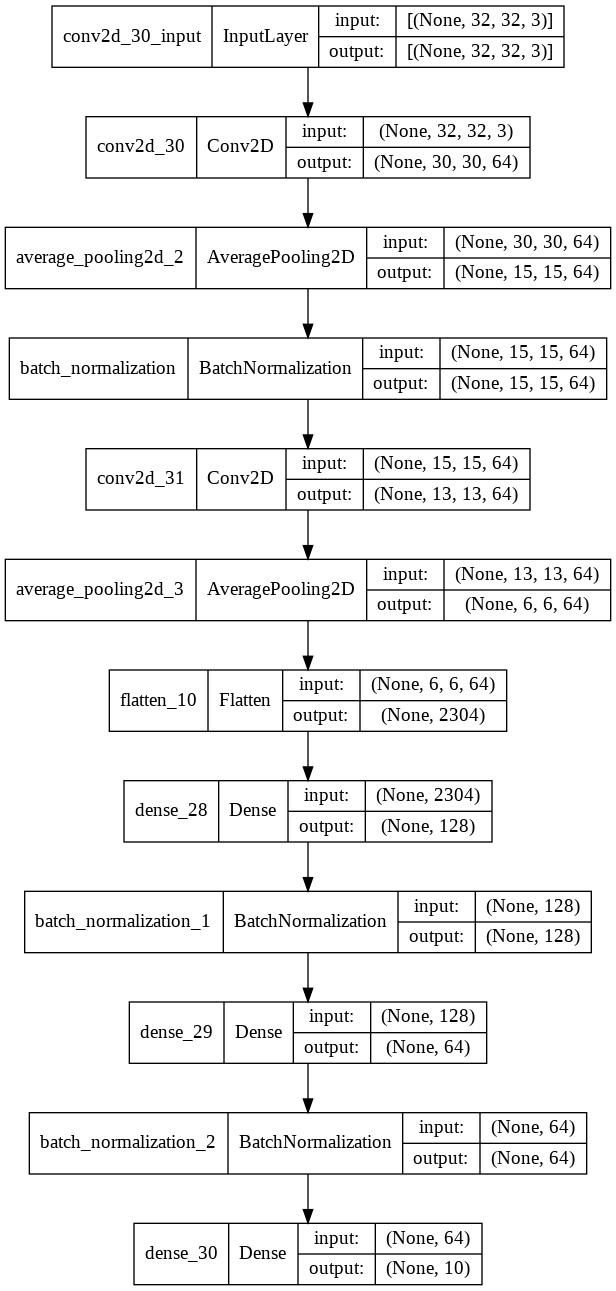

In [ ]:
#Diagram of CNN architecture
plot_model(model2_avg_BN, to_file= 'model2_avg_BN_plot.png', show_shapes=True,show_layer_names= True)

In [ ]:
r = model2_avg_BN.fit(X_train,y_train,
  validation_data=(x_val, y_val), callbacks= [model_checkpoint_callback], 
  epochs=10
)

Epoch 1/10
1832/1832 [==============================] - 129s 70ms/step - loss: 0.7596 - accuracy: 0.7615 - val_loss: 0.5715 - val_accuracy: 0.8280
Epoch 2/10
1832/1832 [==============================] - 127s 69ms/step - loss: 0.4364 - accuracy: 0.8678 - val_loss: 0.6371 - val_accuracy: 0.8017
Epoch 3/10
1832/1832 [==============================] - 127s 69ms/step - loss: 0.3721 - accuracy: 0.8884 - val_loss: 0.4432 - val_accuracy: 0.8681
Epoch 4/10
1832/1832 [==============================] - 127s 69ms/step - loss: 0.3227 - accuracy: 0.9019 - val_loss: 0.3534 - val_accuracy: 0.8965
Epoch 5/10
1832/1832 [==============================] - 126s 69ms/step - loss: 0.2873 - accuracy: 0.9126 - val_loss: 0.3665 - val_accuracy: 0.8911
Epoch 6/10
1832/1832 [==============================] - 126s 69ms/step - loss: 0.2530 - accuracy: 0.9232 - val_loss: 0.4532 - val_accuracy: 0.8684
Epoch 7/10
1832/1832 [==============================] - 126s 69ms/step - loss: 0.2248 - accuracy: 0.9312 - val_loss: 0

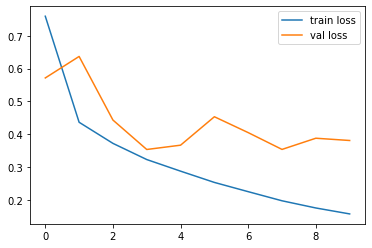

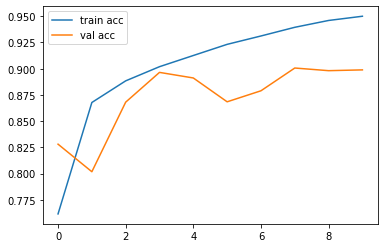

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2_avg, to_file='model2_avg_BN_plot.png', show_shapes=True, show_layer_names=True)
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred_model2_avg_BN = model2_avg_BN.predict(X_test)
y_pred_model2_avg_BN = np.argmax(y_pred_model2_avg_BN, axis=1)
len(y_pred_model2_avg_BN)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg_BN,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg_BN))
model2_avg_BN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg_BN.predict(X_test), y_test)

F1 Score: 0.8796158558434598
Explained Variance Score: 0.7400854360316181


0.01648605798395174

In [ ]:
# Best model is Model 2 with average pooling and adding batch normalizer layers

## Task: 4 Changing Optimizers and Parameters

In [ ]:
from tensorflow import keras
from keras.optimizers import adam_v2
from keras.optimizers import rmsprop_v2
from keras.optimizers import gradient_descent_v2 

In [ ]:
#Adam
opt1 = adam_v2.Adam(learning_rate=0.001)
opt2 = adam_v2.Adam(learning_rate=0.1)
opt3 = adam_v2.Adam(learning_rate=0.05)

Epoch 1/10
1832/1832 [==============================] - 135s 73ms/step - loss: 0.1451 - accuracy: 0.9535 - val_loss: 0.4431 - val_accuracy: 0.8879
Epoch 2/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.1276 - accuracy: 0.9590 - val_loss: 0.4724 - val_accuracy: 0.8792
Epoch 3/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.1155 - accuracy: 0.9619 - val_loss: 0.4983 - val_accuracy: 0.8828
Epoch 4/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.1079 - accuracy: 0.9649 - val_loss: 0.4593 - val_accuracy: 0.8826
Epoch 5/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.1004 - accuracy: 0.9666 - val_loss: 0.5362 - val_accuracy: 0.8804
Epoch 6/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.0939 - accuracy: 0.9690 - val_loss: 0.4744 - val_accuracy: 0.8931
Epoch 7/10
1832/1832 [==============================] - 137s 75ms/step - loss: 0.0875 - accuracy: 0.9707 - val_loss: 0

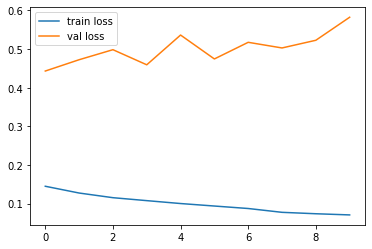

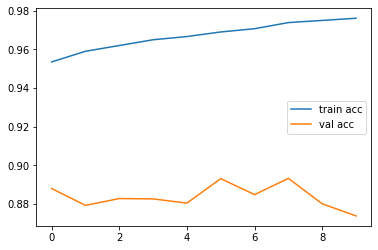

F1 Score: 0.8636248473339515
Explained Variance Score: 0.713649112428723


0.01967976619600999

<Figure size 432x288 with 0 Axes>

In [ ]:
# Using opt 1 (ADAM learning_rate=0.001 )
model2_avg_BN.compile(
  loss='categorical_crossentropy',
  optimizer=opt1,
  metrics=['accuracy']
)

r = model2_avg_BN.fit(
  X_train,y_train,
  validation_data=(X_test, y_test),
  epochs=10
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#performance
y_pred_model2_avg_BN = model2_avg_BN.predict(X_test)
y_pred_model2_avg_BN = np.argmax(y_pred_model2_avg_BN, axis=1)
len(y_pred_model2_avg_BN)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg_BN,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg_BN))
model2_avg_BN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg_BN.predict(X_test), y_test)

Epoch 1/10
1832/1832 [==============================] - 139s 75ms/step - loss: 2.3228 - accuracy: 0.1628 - val_loss: 2.2603 - val_accuracy: 0.1959
Epoch 2/10
1832/1832 [==============================] - 136s 74ms/step - loss: 2.3106 - accuracy: 0.1628 - val_loss: 2.3251 - val_accuracy: 0.1784
Epoch 3/10
1832/1832 [==============================] - 137s 75ms/step - loss: 2.3110 - accuracy: 0.1619 - val_loss: 19.4637 - val_accuracy: 0.1718
Epoch 4/10
1832/1832 [==============================] - 136s 74ms/step - loss: 2.3066 - accuracy: 0.1596 - val_loss: 2.4302 - val_accuracy: 0.1221
Epoch 5/10
1832/1832 [==============================] - 137s 75ms/step - loss: 2.3042 - accuracy: 0.1624 - val_loss: 5.4086 - val_accuracy: 0.1956
Epoch 6/10
1832/1832 [==============================] - 136s 74ms/step - loss: 2.3352 - accuracy: 0.1566 - val_loss: 35010.5781 - val_accuracy: 0.1165
Epoch 7/10
1832/1832 [==============================] - 136s 74ms/step - loss: 2.3125 - accuracy: 0.1675 - val_lo

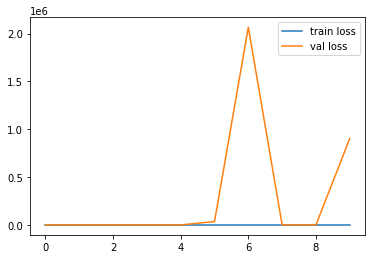

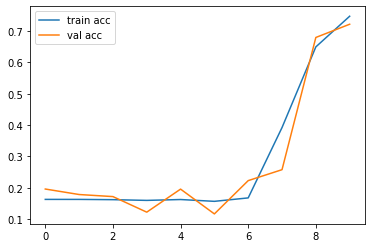

F1 Score: 0.6747305805135682
Explained Variance Score: 0.4150508675587188


0.04057291407571329

<Figure size 432x288 with 0 Axes>

In [ ]:
# Using opt 2 (ADAM learning_rate=0.1 )
model2_avg_BN.compile(
  loss='categorical_crossentropy',
  optimizer=opt2,
  metrics=['accuracy']
)

r = model2_avg_BN.fit(
  X_train,y_train,
  validation_data=(X_test, y_test),
  epochs=10
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#performance
y_pred_model2_avg_BN = model2_avg_BN.predict(X_test)
y_pred_model2_avg_BN = np.argmax(y_pred_model2_avg_BN, axis=1)
len(y_pred_model2_avg_BN)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg_BN,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg_BN))
model2_avg_BN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg_BN.predict(X_test), y_test)

Epoch 1/10
1832/1832 [==============================] - 138s 75ms/step - loss: 0.6313 - accuracy: 0.8112 - val_loss: 137358.6562 - val_accuracy: 0.7876
Epoch 2/10
1832/1832 [==============================] - 135s 74ms/step - loss: 0.5790 - accuracy: 0.8264 - val_loss: 6592.6934 - val_accuracy: 0.8125
Epoch 3/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.5485 - accuracy: 0.8358 - val_loss: 113.2342 - val_accuracy: 0.8068
Epoch 4/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.5276 - accuracy: 0.8410 - val_loss: 365.8441 - val_accuracy: 0.8104
Epoch 5/10
1832/1832 [==============================] - 137s 75ms/step - loss: 0.4990 - accuracy: 0.8505 - val_loss: 1185.8425 - val_accuracy: 0.8274
Epoch 6/10
1832/1832 [==============================] - 135s 74ms/step - loss: 0.4824 - accuracy: 0.8549 - val_loss: 1464.8610 - val_accuracy: 0.8529
Epoch 7/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.4682 - accuracy: 0.

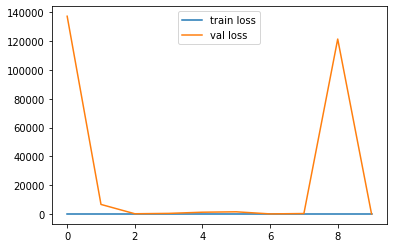

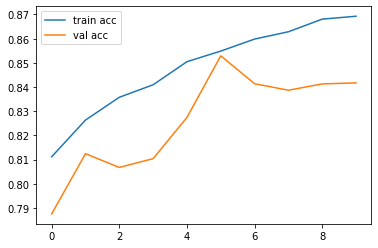

F1 Score: 0.8262213684590766
Explained Variance Score: 0.5414268485628986


0.023562209006430423

<Figure size 432x288 with 0 Axes>

In [ ]:
# Using opt 3 (ADAM learning_rate=0.05 )
model2_avg_BN.compile(
  loss='categorical_crossentropy',
  optimizer=opt3,
  metrics=['accuracy']
)

r = model2_avg_BN.fit(
  X_train,y_train,
  validation_data=(X_test, y_test),
  epochs=10
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#performance
y_pred_model2_avg_BN = model2_avg_BN.predict(X_test)
y_pred_model2_avg_BN = np.argmax(y_pred_model2_avg_BN, axis=1)
len(y_pred_model2_avg_BN)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg_BN,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg_BN))
model2_avg_BN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg_BN.predict(X_test), y_test)

In [ ]:
#Adamax
opt7 = tf.keras.optimizers.Adamax(learning_rate=0.001)
opt8 = tf.keras.optimizers.Adamax(learning_rate=0.01)
opt9 = tf.keras.optimizers.Adamax(learning_rate=0.005)

Epoch 1/10
1832/1832 [==============================] - 139s 75ms/step - loss: 0.3732 - accuracy: 0.8873 - val_loss: 97.2642 - val_accuracy: 0.8669
Epoch 2/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3571 - accuracy: 0.8933 - val_loss: 46.8710 - val_accuracy: 0.8685
Epoch 3/10
1832/1832 [==============================] - 135s 74ms/step - loss: 0.3520 - accuracy: 0.8943 - val_loss: 44595.7070 - val_accuracy: 0.8707
Epoch 4/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.3482 - accuracy: 0.8953 - val_loss: 123643.5391 - val_accuracy: 0.8714
Epoch 5/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3457 - accuracy: 0.8955 - val_loss: 193847.6562 - val_accuracy: 0.8712
Epoch 6/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3441 - accuracy: 0.8977 - val_loss: 219538.6719 - val_accuracy: 0.8723
Epoch 7/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3411 - accuracy:

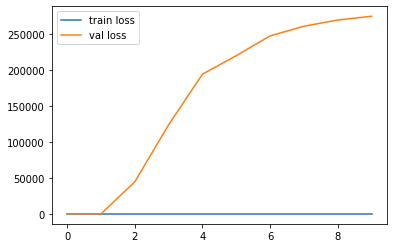

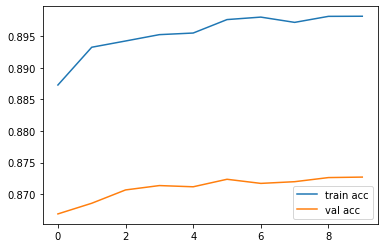

F1 Score: 0.8601243581386298
Explained Variance Score: 0.6737111035128851


0.01877406156407658

<Figure size 432x288 with 0 Axes>

In [ ]:
# Using opt 7 Adamax(learning_rate=0.001)
model2_avg_BN.compile(
  loss='categorical_crossentropy',
  optimizer=opt7,
  metrics=['accuracy']
)

r = model2_avg_BN.fit(
  X_train,y_train,
  validation_data=(X_test, y_test),
  epochs=10
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#performance
y_pred_model2_avg_BN = model2_avg_BN.predict(X_test)
y_pred_model2_avg_BN = np.argmax(y_pred_model2_avg_BN, axis=1)
len(y_pred_model2_avg_BN)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg_BN,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg_BN))
model2_avg_BN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg_BN.predict(X_test), y_test)

Epoch 1/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3412 - accuracy: 0.8969 - val_loss: 176775.8906 - val_accuracy: 0.8719
Epoch 2/10
1832/1832 [==============================] - 135s 74ms/step - loss: 0.3371 - accuracy: 0.8984 - val_loss: 144751.6875 - val_accuracy: 0.8725
Epoch 3/10
1832/1832 [==============================] - 135s 74ms/step - loss: 0.3373 - accuracy: 0.8985 - val_loss: 87413.2422 - val_accuracy: 0.8715
Epoch 4/10
1832/1832 [==============================] - 135s 74ms/step - loss: 0.3336 - accuracy: 0.9003 - val_loss: 67748.5938 - val_accuracy: 0.8716
Epoch 5/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.3323 - accuracy: 0.9001 - val_loss: 54652.0430 - val_accuracy: 0.8715
Epoch 6/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.3331 - accuracy: 0.8998 - val_loss: 39462.0000 - val_accuracy: 0.8702
Epoch 7/10
1832/1832 [==============================] - 134s 73ms/step - loss: 0.3327 - accu

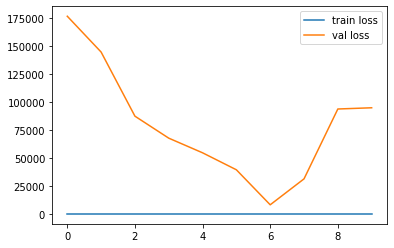

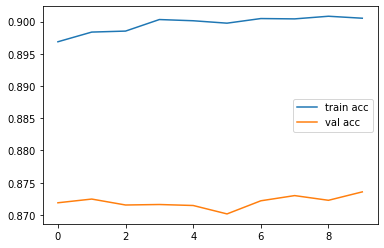

F1 Score: 0.8606099729819308
Explained Variance Score: 0.6777141381523499


0.01862196762119882

<Figure size 432x288 with 0 Axes>

In [ ]:
# Using opt 8 Adamax(learning_rate=0.01)
model2_avg_BN.compile(
  loss='categorical_crossentropy',
  optimizer=opt8,
  metrics=['accuracy']
)

r = model2_avg_BN.fit(
  X_train,y_train,
  validation_data=(X_test, y_test),
  epochs=10
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#performance
y_pred_model2_avg_BN = model2_avg_BN.predict(X_test)
y_pred_model2_avg_BN = np.argmax(y_pred_model2_avg_BN, axis=1)
len(y_pred_model2_avg_BN)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg_BN,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg_BN))
model2_avg_BN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg_BN.predict(X_test), y_test)

Epoch 1/10
1832/1832 [==============================] - 138s 75ms/step - loss: 0.3257 - accuracy: 0.9027 - val_loss: 35170.4961 - val_accuracy: 0.8733
Epoch 2/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3251 - accuracy: 0.9022 - val_loss: 29058.7715 - val_accuracy: 0.8729
Epoch 3/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3264 - accuracy: 0.9024 - val_loss: 65955.1719 - val_accuracy: 0.8711
Epoch 4/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3243 - accuracy: 0.9026 - val_loss: 50455.9609 - val_accuracy: 0.8731
Epoch 5/10
1832/1832 [==============================] - 137s 75ms/step - loss: 0.3234 - accuracy: 0.9031 - val_loss: 45080.9727 - val_accuracy: 0.8728
Epoch 6/10
1832/1832 [==============================] - 135s 74ms/step - loss: 0.3232 - accuracy: 0.9030 - val_loss: 99749.3984 - val_accuracy: 0.8733
Epoch 7/10
1832/1832 [==============================] - 136s 74ms/step - loss: 0.3239 - accura

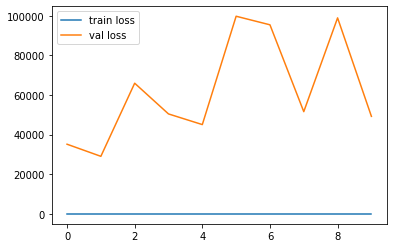

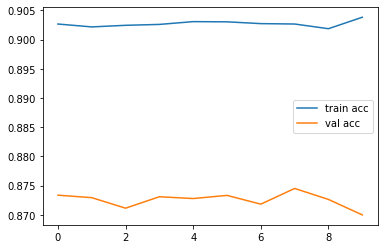

F1 Score: 0.8572100117046911
Explained Variance Score: 0.6695559612327107


0.01890289550403125

<Figure size 432x288 with 0 Axes>

In [ ]:
# Using opt 9 Adamax(learning_rate=0.005)
model2_avg_BN.compile(
  loss='categorical_crossentropy',
  optimizer=opt9,
  metrics=['accuracy']
)

r = model2_avg_BN.fit(
  X_train,y_train,
  validation_data=(X_test, y_test),
  epochs=10
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#performance
y_pred_model2_avg_BN = model2_avg_BN.predict(X_test)
y_pred_model2_avg_BN = np.argmax(y_pred_model2_avg_BN, axis=1)
len(y_pred_model2_avg_BN)
print("F1 Score:",f1_score(test_label, y_pred_model2_avg_BN,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model2_avg_BN))
model2_avg_BN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
mean_squared_error(model2_avg_BN.predict(X_test), y_test)

## Task 5

In [ ]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same", input_shape=(32,32,3)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3)),
#     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=256, kernel_size=(3,3),  activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=256, kernel_size=(3,3),  activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])
# model._name = "MyModel_final"
# model.summary()

Model: "MyModel_final"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_36 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 batch_normalization_37 (Bat  (None, 10, 10, 64)       256       
 chNormalization)                                                
                                                     

In [ ]:
# Kernal - 3*3 optimal; Padding: same; Strides= 2; Dense: 512
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(32,32,3), padding='same', strides=2))
model.add(tf.keras.layers.MaxPool2D((3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', padding='same',  strides=2))
model.add(tf.keras.layers.MaxPool2D((3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3, 3), activation='relu', padding='same',  strides=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model._name = "MyModel"
model.summary()

Model: "MyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 16, 16, 64)        1792      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_47 (Bat  (None, 5, 5, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_85 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                           

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
)

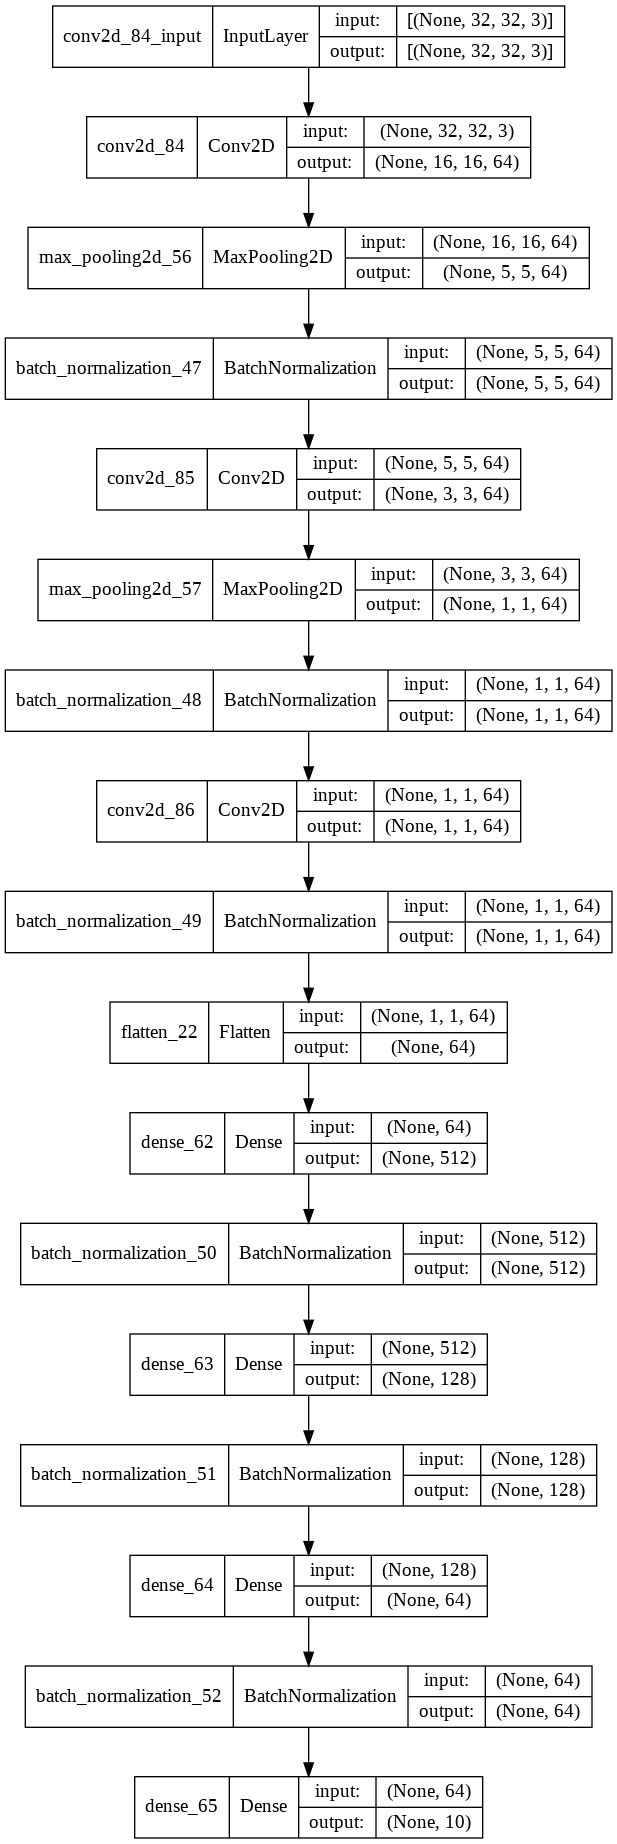

In [ ]:
#Diagram of CNN architecture
plot_model(model, to_file= 'model.png', show_shapes=True,show_layer_names= True)

Epoch 1/25
1832/1832 [==============================] - 35s 18ms/step - loss: 1.4324 - accuracy: 0.5150 - val_loss: 1.0983 - val_accuracy: 0.6446
Epoch 2/25
1832/1832 [==============================] - 32s 17ms/step - loss: 0.7860 - accuracy: 0.7481 - val_loss: 0.8014 - val_accuracy: 0.7348
Epoch 3/25
1832/1832 [==============================] - 31s 17ms/step - loss: 0.6852 - accuracy: 0.7826 - val_loss: 0.6733 - val_accuracy: 0.7870
Epoch 4/25
1832/1832 [==============================] - 31s 17ms/step - loss: 0.6409 - accuracy: 0.7963 - val_loss: 0.6487 - val_accuracy: 0.7942
Epoch 5/25
1832/1832 [==============================] - 32s 17ms/step - loss: 0.6003 - accuracy: 0.8085 - val_loss: 0.6957 - val_accuracy: 0.7788
Epoch 6/25
1832/1832 [==============================] - 32s 17ms/step - loss: 0.5739 - accuracy: 0.8177 - val_loss: 0.6403 - val_accuracy: 0.7983
Epoch 7/25
1832/1832 [==============================] - 32s 17ms/step - loss: 0.5518 - accuracy: 0.8255 - val_loss: 0.8259 -

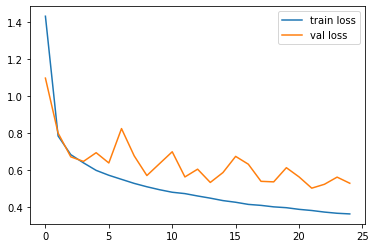

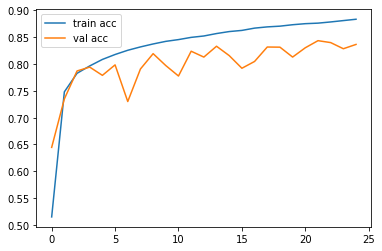

F1 Score: 0.8224882350285616
Explained Variance Score: 0.6242284879717945
Mean Square Error: 0.023444877789180106


<Figure size 432x288 with 0 Axes>

In [ ]:
r = model.fit(
  X_train,y_train,
  validation_data=(X_test, y_test),
  epochs= 25
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#performance
y_pred_model = model.predict(X_test)
y_pred_model = np.argmax(y_pred_model, axis=1)
len(y_pred_model)
print("F1 Score:",f1_score(test_label, y_pred_model,average='macro'))
print("Explained Variance Score:",explained_variance_score(test_label, y_pred_model))
print("Mean Square Error:" ,mean_squared_error(model.predict(X_test), y_test))